# <span style="color:#0F19C9">Contenido</span>

- [Importar librerías y datos](#importar-librerías-y-datos)
- [Dataframe contract](#dataframe-contract)
- [Dataframe personal](#dataframe-personal)
- [Dataframe internet](#dataframe-internet)
- [Dataframe phone](#dataframe-phone)
- [Análisis Entre Dataframes](#análisis-entre-dataframes)
- [Crear Nuevas Característica](#crear-nuevas-características)
- [Conclusiones](#conclusiones)
- [Preguntas Aclaratorias](#preguntas-aclaratorias)
- [Plan](#plan)

# <span style="color:#0F19C9">Importar librerías y datos</span>

Comenzaremos por importar librerías de manipulación de dataframes, para la realización de pruebas estadísticas y matplotlib para la visualización de datos.

In [108]:
# Librerías de manejo de dataframes
import pandas as pd
import numpy as np

# Librerías de pruebas estadísticas
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [109]:
# Importar paletas de colores personalizada
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Configurar la fuente de los gráficos
plt.rc('font', family='Georgia', size=12)

In [110]:
# Importar dataframes en un diccionario
dfs = {'contract': pd.read_csv('../Data/contract.csv'),
       'internet': pd.read_csv('../Data/internet.csv'),
       'personal': pd.read_csv('../Data/personal.csv'),
       'phone': pd.read_csv('../Data/phone.csv')}

# <span style="color:#0F19C9">Exploración inicial</span>

Comenzamos evaluando la calidad general de cada uno de los dataframes.

In [111]:
# Mostrar la información general de los dataframes
for name, df in dfs.items():
    print(f'Dataframe {name}')
    df.info()
    print('---------\n')

Dataframe contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
---------

Dataframe internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non

In [112]:
# Mostrar valores nulos y duplicados
for name, df in dfs.items():
    print(
        f'El dataframe {name} tiene {df.duplicated().sum()} registros duplicados y {df.isna().sum().sum()} valores nulos.')

El dataframe contract tiene 0 registros duplicados y 0 valores nulos.
El dataframe internet tiene 0 registros duplicados y 0 valores nulos.
El dataframe personal tiene 0 registros duplicados y 0 valores nulos.
El dataframe phone tiene 0 registros duplicados y 0 valores nulos.


In [113]:
# Escribir el nombre exacto de las columnas
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['customerID', 'MultipleLines']


In [114]:
# Modificar el formato del nombre de las columnas
dfs['contract'].columns = ['CustomerID', 'BeginDate', 'EndDate', 'Type',
                           'PaperlessBilling', 'PaymentMethod',
                           'MonthlyCharges', 'TotalCharges']
dfs['internet'].columns = ['CustomerID', 'InternetService', 'OnlineSecurity',
                           'OnlineBackup', 'DeviceProtection', 'TechSupport',
                           'StreamingTV', 'StreamingMovies']
dfs['personal'].columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
                           'Dependents']
dfs['phone'].columns = ['CustomerID', 'MultipleLines']

In [115]:
# Comprobar las modificaciones
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['CustomerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['CustomerID', 'MultipleLines']


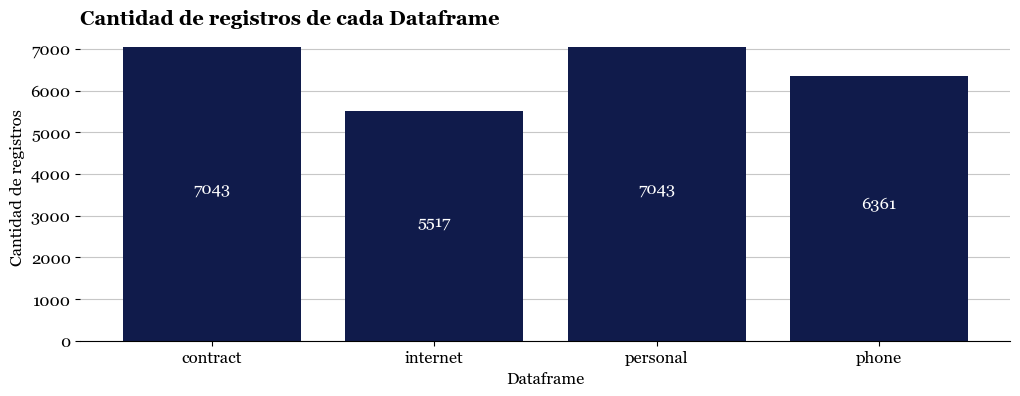

In [116]:
# Graficar la cantidad de registros de cada dataframe
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Cantidad de registros de cada Dataframe',
          weight='bold', loc='left')
bars = plt.bar(dfs.keys(),
               [df.shape[0] for df in dfs.values()],
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height()}',
             ha='center',
             color='white')
plt.xlabel('Dataframe')
plt.ylabel('Cantidad de registros')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

Nos encontramos con 4 archivos Comma-Separated Values (CSV) con la información correspondiente a los usuarios de la compañía Interconnect. Ninguno de los dataframes contiene registros duplicados, ni registros nulos. Cada archivo contiene los siguiente:
- El dataframe `contract` contiene la información del contrato de los servicios con una columna de `customerID` que indica un valor único para cada usuario.
- El dataframe `internet` contiene los servicios específicos que presta la compañía en internet.
    - La columna `InternetService` especifica el tipo de servicio DSL o Fibra Óptica.
    - Los otros servicios opcionales que son:
        - `OnlineSecurity`: Bloqueador de sitios web maliciosos.
        - `OnlineBackup`: Almacenamiento de archivos en la nube.
        - `DeviceProtection`: Software antivirus.
        - `TechSupport`: Línea de soporte técnico.
        - `StreamingTV`: Streaming de TV.
        - `StreamingMovies`: Streaming de películas.
- El dataframe `personal` contiene los datos personales del cliente.
- El dataframe `phone` contiene el servicio de líneas separadas de telefonía fija.

La única modificación inicial que se realizó, fue modificar el formato del nombre de las columnas para estandarizarlo, dejando todas con la primera letra mayúscula.

Los dataframes `contract` y `personal` contienen la mayor cantidad de registros (7043). El dataframe `internet` contiene 5517 y `phone` 6361.

# <span style="color:#0F19C9">Dataframe contract</span>

Exploraremos el dataframe contract, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

In [117]:
# Comprobar el número de CustomerIDs únicos
dfs['contract']['CustomerID'].nunique() == dfs['contract'].shape[0]

True

In [118]:
# Corregir el tipo de columna PaperlessBilling
dfs['contract']['PaperlessBilling'] = dfs['contract']['PaperlessBilling'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')

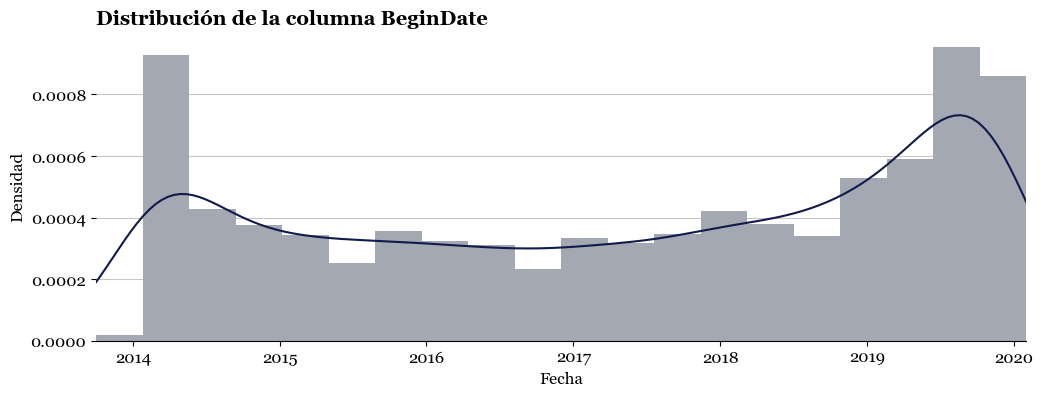

count                             7043
mean     2017-04-30 13:01:50.918642688
min                2013-10-01 00:00:00
25%                2015-06-01 00:00:00
50%                2017-09-01 00:00:00
75%                2019-04-01 00:00:00
max                2020-02-01 00:00:00
Name: BeginDate, dtype: object

In [119]:
# Modificar el formato de BeginDate
dfs['contract']['BeginDate'] = pd.to_datetime(dfs['contract']['BeginDate'])

# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna BeginDate',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['BeginDate'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['BeginDate'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['BeginDate'].min(),
          dfs['contract']['BeginDate'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['BeginDate'].describe()

In [120]:
# Contar los valores individuales normalizados de la columna EndDate
dfs['contract']['EndDate'].value_counts(normalize=True)

EndDate
No                     0.734630
2019-11-01 00:00:00    0.068863
2019-12-01 00:00:00    0.066165
2020-01-01 00:00:00    0.065313
2019-10-01 00:00:00    0.065029
Name: proportion, dtype: float64

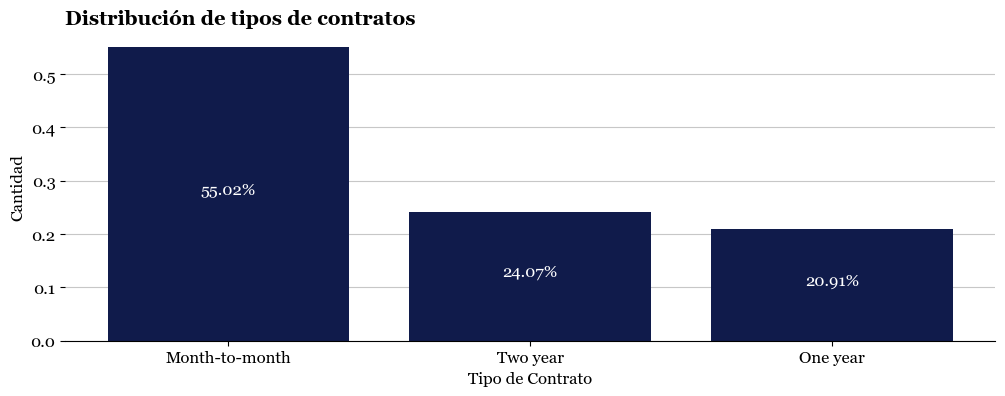

In [121]:
# Contar los valores normalizados de la columna Type
type_contract = dfs['contract']['Type'].value_counts(normalize=True)

# Graficar la distribución de tipos
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de tipos de contratos',
          weight='bold', loc='left')
bars = plt.bar(type_contract.index,
               type_contract,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{(bar.get_height())*100:.2f}%',
             ha='center',
             color='white')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

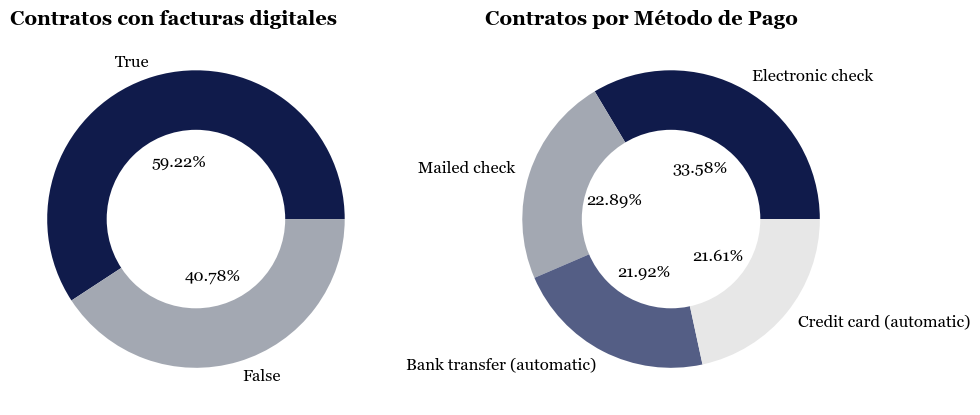

In [122]:
# Contar los valores normalizados de la columna PaperlessBilling
paper_contracts = dfs['contract']['PaperlessBilling'].value_counts(
    normalize=True)

# Contar los valores normalizados de la columna PaperlessBilling
payment_contracts = dfs['contract']['PaymentMethod'].value_counts(
    normalize=True)

# Graficar la distribución de paperless
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
ax[0].set_title('Contratos con facturas digitales',
                loc='left', weight='bold')
paper_contracts \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax[0])
ax[0].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[0].transData)
ax[0].add_artist(hole1)

ax[1].set_title('Contratos por Método de Pago',
                loc='left', weight='bold')
payment_contracts \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2],
                      juan_colors[1], juan_colors[3]],
              ax=ax[1])
ax[1].set_ylabel('')
hole2 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[1].transData)
ax[1].add_artist(hole2)
plt.tight_layout()
plt.show()

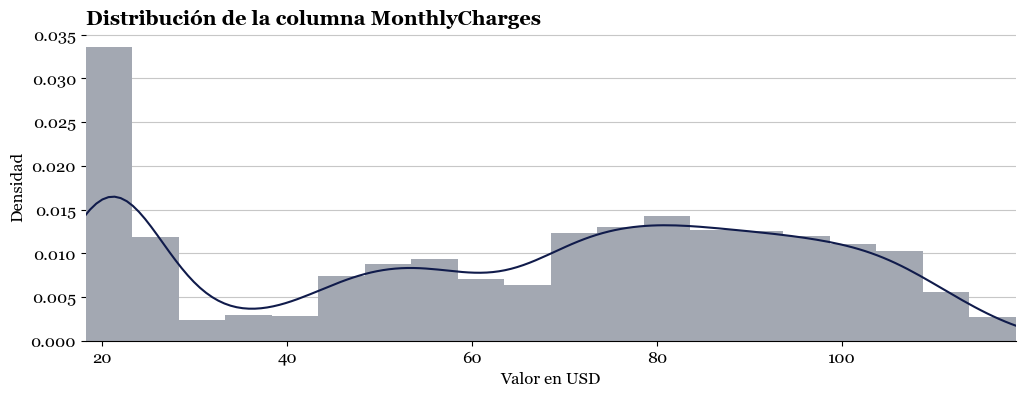

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [123]:
# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna MonthlyCharges',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['MonthlyCharges'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['MonthlyCharges'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['MonthlyCharges'].min(),
          dfs['contract']['MonthlyCharges'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Valor en USD')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['MonthlyCharges'].describe()

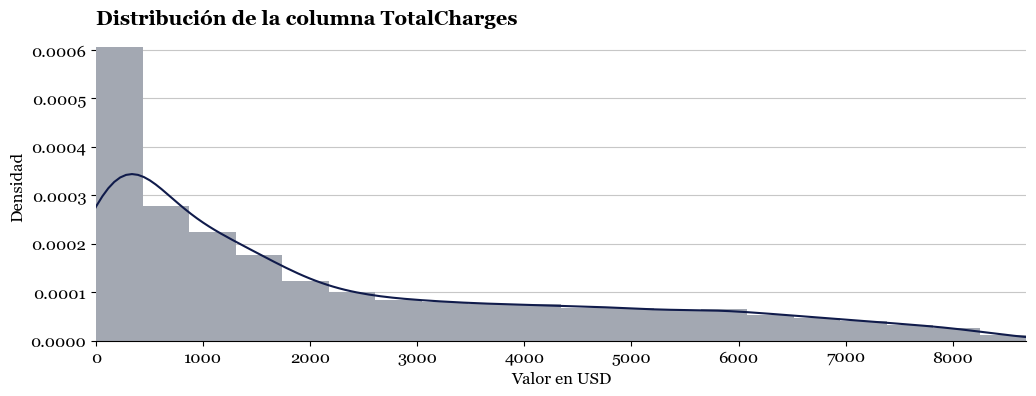

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [124]:
# Corregir el formato de la columna TotalCharges
dfs['contract']['TotalCharges'] = dfs['contract']['TotalCharges'] \
    .replace(' ', '0').astype('float')

# Estudiar su distribución
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Distribución de la columna TotalCharges',
          weight='bold', loc='left')
sns.kdeplot(dfs['contract']['TotalCharges'],
            color=juan_colors[0],
            zorder=3)
plt.hist(dfs['contract']['TotalCharges'],
         density=True, color=juan_colors[2],
         bins=20, zorder=2)
plt.xlim((dfs['contract']['TotalCharges'].min(),
          dfs['contract']['TotalCharges'].max()))
plt.grid(axis='y', zorder=1, alpha=0.7)
plt.xlabel('Valor en USD')
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Describir estadísticamente
dfs['contract']['TotalCharges'].describe()

In [125]:
# Mostrar valores de TotalCharges igual a 0
dfs['contract'][dfs['contract']['TotalCharges'] == 0]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,True,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,False,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,False,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,False,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,False,Credit card (automatic),56.05,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,False,Mailed check,19.85,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,False,Mailed check,25.35,0.0
4380,2520-SGTTA,2020-02-01,No,Two year,False,Mailed check,20.00,0.0
5218,2923-ARZLG,2020-02-01,No,One year,True,Mailed check,19.70,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,False,Mailed check,73.35,0.0


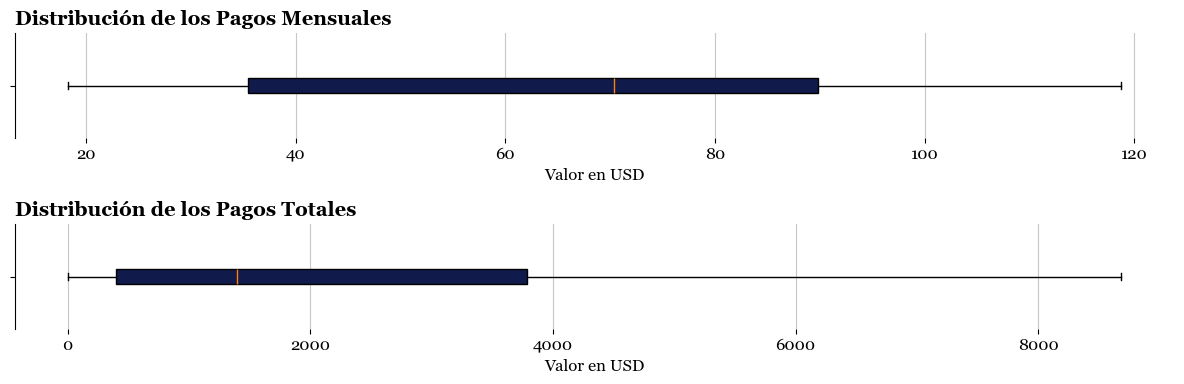

In [126]:
# Encontrar valores atípicos en los pagos
fig, ax = plt.subplots(2, 1, figsize=[12, 4])
ax[0].set_title('Distribución de los Pagos Mensuales',
                weight='bold', loc='left')
ax[0].boxplot(dfs['contract']['MonthlyCharges'],
              vert=False, patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].grid(axis='x', zorder=1, alpha=0.7)
ax[0].set_xlabel('Valor en USD')
ax[0].set_yticklabels([''])
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)

ax[1].set_title('Distribución de los Pagos Totales',
                weight='bold', loc='left')
ax[1].boxplot(dfs['contract']['TotalCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].grid(axis='x', zorder=1, alpha=0.7)
ax[1].set_xlabel('Valor en USD')
ax[1].set_yticklabels([''])
ax[1].spines[['top', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()

Comprobamos que efectivamente tenemos valores únicos en la columna de `CustomerID` y que únicamente haya un registro por cada usuario. El contrato más antiguo comenzó el 1 de octubre de 2023, mientras el último fue firmado el 1 de febrero de 2020. Sin embargo, llama bastante la atención que en el 2014 y en el 2019 haya dos picos grandes de contratos iniciados. Es también importante mencionar que a partir de 2017, la compañía ha mostrado una tendencia al alza en las altas.

Respecto a la columna `EndDate`, tenemos únicamente 4 valores válidos en los que podemos evidenciar que las terminaciones de los contratos se producen al cambio de mes. Llama la atención que únicamente tengamos terminaciones en los meses de octubre, noviembre y diciembre del 2019 y en enero de 2020.

El 55.02% de los contratos son pagos mensuales, mientras el 24.07% son contratos a dos años, finalmente los contratos a un año representan el 20.91% del total de contratos. Además, el 59.22% de los registros han preferido el envío de sus facturas de manera digital.

En cuanto a los pagos mensuales, se observa una gran concentración sobre los USD $20, sin embargo no podemos hablar de una distribución normal, entre otras, porque hay una gran cantidad de pagos mensuales entre los USD $70 y los USD $110. Finalmente, para la columna de TotalCharges, se corrigió el formato de object a float y, como se ve en su distribución, sigue una distribución estándar. Sin embargo, nos encontramos con un valor '  ' que reemplazamos por 0, debido a que correspondía a 11 registros de contratos que comenzaron el 1 de febrero de 2020 y que son de uno o dos años, por lo que aún no ha habido pago total efectuado. Ni en la columna de pagos mensuales, ni en la columna de pagos totales encontramos valores atípicos.

## <span style="color:#0F19C9">Análisis Multivariable</span>

Debido a que tenemos gran cantidad de columnas categóricas, entonces correremos tanto la prueba de Pearson de Chi Cuadrado, como la prueba de Cramér's V.

TODO: Crear una columna nueva con el tiempo de permanencia de la persona basado en EndDate. Luego modificar sus valores para el entrenamiento.

In [127]:
# Encontrar correlación de Pearson
stats.pearsonr(dfs['contract']['MonthlyCharges'],
               dfs['contract']['TotalCharges'])

PearsonRResult(statistic=0.6511738315787841, pvalue=0.0)

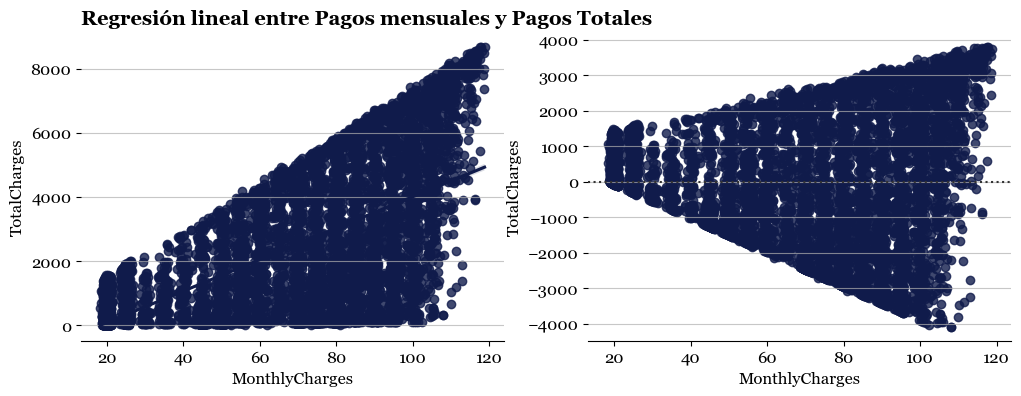

In [128]:
# Graficar regresión lineal
fig, ax = plt.subplots(1, 2, figsize=[12, 4])
ax[0].set_title('Regresión lineal entre Pagos mensuales y Pagos Totales',
                weight='bold', loc='left')
sns.regplot(data=dfs['contract'],
            x='MonthlyCharges',
            y='TotalCharges',
            ax=ax[0], color=juan_colors[0])
ax[0].grid(axis='y', zorder=1, alpha=0.7)
ax[0].spines[['top', 'right', 'left']].set_visible(False)

sns.residplot(data=dfs['contract'],
              x='MonthlyCharges',
              y='TotalCharges',
              ax=ax[1], color=juan_colors[0])
ax[1].grid(axis='y', zorder=1, alpha=0.7)
ax[1].spines[['top', 'right', 'left']].set_visible(False)
plt.show()

In [129]:
# Ajustar el modelo OLS
X = sm.add_constant(dfs['contract']['TotalCharges'])
y = dfs['contract']['MonthlyCharges']
ols_model = sm.OLS(y, X).fit()

# Realizar el test de Breusch-Pagan
print('Valor P:', het_breuschpagan(ols_model.resid, ols_model.model.exog)[1])

Valor P: 0.0


Tenemos una relación de fuerza media, por el coeficiente de Pearson de 0.65 entre las columnas de `MonthlyCharges` y `TotalCharges`. Con un valor P de 0.0, nos da a entender que la correlación es significativa, razón por la que graficamos su regresión lineal. Sin embargo, la gráfica de residuo nos demuestra una heterocedasticidad que comprobamos aplicando el Test de Breusch-Pagan, al obtener un valor 0.0 a 0.05, lo comprobamos.

In [130]:
# Función para calcular el valor p y Cramér's V
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return p, np.sqrt(chi2 / (n * (min(k, r) - 1)))

In [131]:
# Definir las columnas categóricas
cat_cols = ['Type', 'PaperlessBilling', 'PaymentMethod']

# Crear matrices vacías para almacenar los resultados
p_values_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                               index=cat_cols, columns=cat_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

# Llenar las matrices
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            # Crear la tabla de contingencia
            confusion_matrix = pd.crosstab(dfs['contract'][col1],
                                           dfs['contract'][col2])

            # Calcular p-value y Cramér's V
            p_value, cramers_v_value = cramers_v(confusion_matrix)
            p_values_matrix.loc[col1, col2] = p_value
            cramers_v_matrix.loc[col1, col2] = cramers_v_value
        else:
            # Si col1 == col2, entonces la relación es perfecta (Cramér's V = 1)
            cramers_v_matrix.loc[col1, col2] = 1
            p_values_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de valores p')
display(p_values_matrix)
print('Matriz de V de Cramér')
display(cramers_v_matrix)

Matriz de valores p


,Type,PaperlessBilling,PaymentMethod
Type,NaN,5.450960e-49,4.067638e-213
PaperlessBilling,5.450960e-49,NaN,4.115239e-94
PaymentMethod,4.067638e-213,4.115239e-94,NaN


Matriz de V de Cramér


,Type,PaperlessBilling,PaymentMethod
Type,1.000000,0.177645,0.266655
PaperlessBilling,0.177645,1.000000,0.248719
PaymentMethod,0.266655,0.248719,1.000000


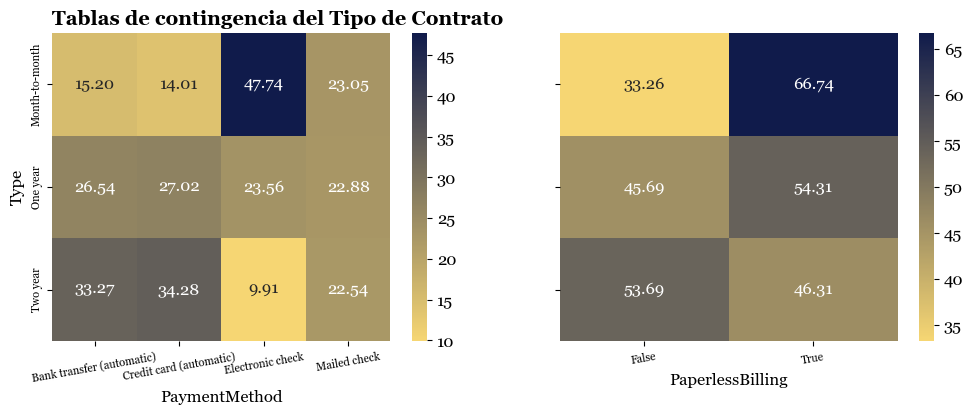

In [132]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(dfs['contract']['Type'],
                          dfs['contract']['PaymentMethod'],
                          normalize='index') * 100
cont_table2 = pd.crosstab(dfs['contract']['Type'],
                          dfs['contract']['PaperlessBilling'],
                          normalize='index') * 100

# Hacer mapa de calor de tabla de contingencia
fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharey=True)
ax[0].set_title('Tablas de contingencia del Tipo de Contrato',
                weight='bold', loc='left')
sns.heatmap(cont_table1, annot=True,
            ax=ax[0], cmap=juan_cmap,
            fmt='.2f')
ax[0].set_xticklabels(ax[0].get_xticklabels(),
                      size=8, rotation=10)
ax[0].set_yticklabels(ax[0].get_yticklabels(), size=8)

sns.heatmap(cont_table2, annot=True,
            ax=ax[1], cmap=juan_cmap,
            fmt='.2f')
ax[1].set_xticklabels(ax[1].get_xticklabels(),
                      size=8, rotation=10)
ax[1].set_ylabel('')
plt.show()

La matriz de valores p, al ser todos menores al valor de nuestra significancia estadística (0.05) nos indica que es muy probable que exista una relación entre las dos variables. Así que medimos el tamaño de la correlación usando la medida de V de Cramér en el que nos resulta que la relación entre `Type` y `PaperlessBilling` es muy débil con un valor de 0.17; mientras las relaciones de `PaymentMethod` tanto con `Type` como con `PaperlessBilling` son moderadas con valores de 0.26 y 0.24, respectivamente. Esto se puede ver principalmente en que la gran mayoría de los pagos mensuales han sido pagados de forma electrónica o a través de correo, con 1850 y 893 registros respectivamente; y que este mismo tipo de factura tiene en su mayoría la factura física, 2586 de ellos. Tampoco podemos ver que las personas que tienen un plan anual son las más propensas en no tener una factura física.

In [133]:
# Realizar las diferentes pruebas ANOVA sobre pago mensual
for cat_col in ['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']:
    groups = [dfs['contract'][dfs['contract'][cat_col] == category]
              ['MonthlyCharges'] for category in dfs['contract'][cat_col].unique()]
    print(
        f"Valor P entre {cat_col} y el pago mensual: {stats.f_oneway(*groups).pvalue}")
print('')

# Realizar las diferentes pruebas ANOVA sobre pago total
for cat_col in ['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']:
    groups = [dfs['contract'][dfs['contract'][cat_col] == category]
              ['TotalCharges'] for category in dfs['contract'][cat_col].unique()]
    print(
        f"Valor P entre {cat_col} y el pago total: {stats.f_oneway(*groups).pvalue}")

Valor P entre EndDate y el pago mensual: 1.718104903234723e-57
Valor P entre Type y el pago mensual: 9.575270975935273e-10
Valor P entre PaperlessBilling y el pago mensual: 9.997602630675124e-205
Valor P entre PaymentMethod y el pago mensual: 1.1802197193575694e-267

Valor P entre EndDate y el pago total: 2.466458244869139e-60
Valor P entre Type y el pago total: 0.0
Valor P entre PaperlessBilling y el pago total: 6.879636732170654e-41
Valor P entre PaymentMethod y el pago total: 5.30941682341985e-200


In [134]:
# Prueba T de Student de pagos con y sin terminación
group1 = dfs['contract'][dfs['contract']['EndDate'] == 'No']['MonthlyCharges']
group2 = dfs['contract'][dfs['contract']['EndDate'] != 'No']['MonthlyCharges']

print(f"Valor P: {stats.ttest_ind(group1, group2).pvalue}")

Valor P: 2.7066456068884154e-60


In [135]:
# Prueba T de Student de pagos con y sin terminación
group1 = dfs['contract'][dfs['contract']['EndDate'] == 'No']['TotalCharges']
group2 = dfs['contract'][dfs['contract']['EndDate'] != 'No']['TotalCharges']

print(f"Valor P: {stats.ttest_ind(group1, group2).pvalue}")

Valor P: 2.127211613240394e-63


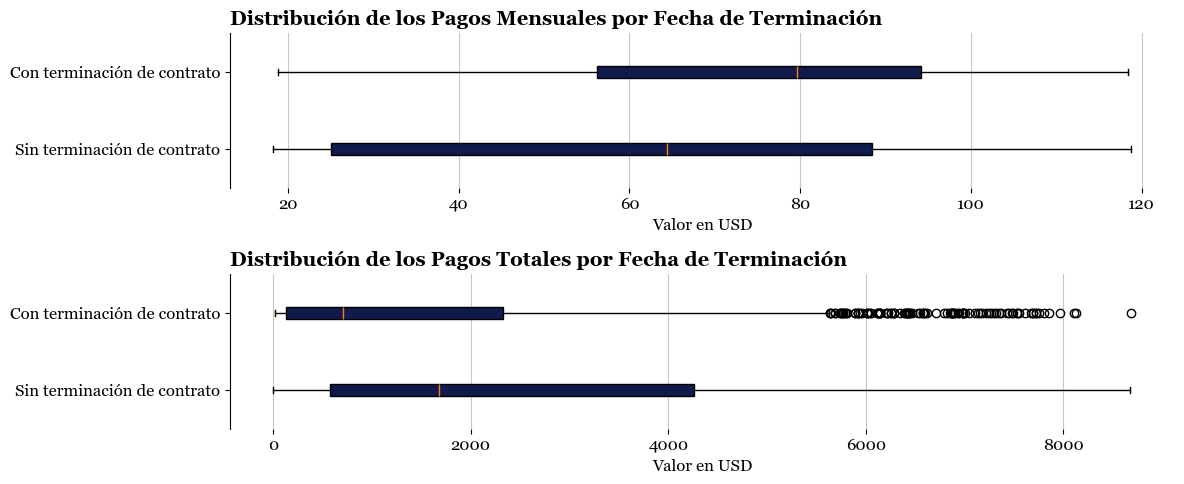

In [136]:
# Graficar las distribuciones
fig, ax = plt.subplots(2, 1, figsize=[12, 5])
ax[0].set_title('Distribución de los Pagos Mensuales por Fecha de Terminación',
                weight='bold', loc='left')
ax[0].boxplot(dfs['contract'][dfs['contract']['EndDate'] == 'No']['MonthlyCharges'],
              vert=False, positions=[1], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].boxplot(dfs['contract'][dfs['contract']['EndDate'] != 'No']['MonthlyCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[0].set_yticks([1, 2])
ax[0].set_yticklabels(['Sin terminación de contrato',
                       'Con terminación de contrato'])
ax[0].grid(axis='x', zorder=1, alpha=0.7)
ax[0].set_xlabel('Valor en USD')
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)

ax[1].set_title('Distribución de los Pagos Totales por Fecha de Terminación',
                weight='bold', loc='left')
ax[1].boxplot(dfs['contract'][dfs['contract']['EndDate'] == 'No']['TotalCharges'],
              vert=False, positions=[1], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].boxplot(dfs['contract'][dfs['contract']['EndDate'] != 'No']['TotalCharges'],
              vert=False, positions=[2], patch_artist=True, boxprops=dict(facecolor=juan_colors[0]))
ax[1].set_yticks([1, 2])
ax[1].set_yticklabels(['Sin terminación de contrato',
                       'Con terminación de contrato'])
ax[1].grid(axis='x', zorder=1, alpha=0.7)
ax[1].set_xlabel('Valor en USD')
ax[1].spines[['top', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()

Realizamos prueba ANOVA para poder determinar si existía alguna diferencia significativa entre nuestras columnas de pago mensual y pago total respecto a las diferentes columnas categóricas. Nos enfocamos en la relación con `EndDate` y con `PaymentMethod` ya que una será nuestra columna objetivo y las otras corresponden a los valores P más pequeños.

De las gráficas en las que comparamos las diferentes categorías de `EndDate` con los pagos mensuales podemos establecer directamente que el promedio de pagos de los clientes que continúan con nosotros son definitivamente más bajos que el promedio de las personas que ya finalizaron su contrato con nosotros, esto lo comprobamos haciendo la prueba t de Student del grupo de clientes que ya terminaron su contrato y de aquellos que no. Esto puede deberse, entre otras cosas, porque los clientes con pagos menores a USD $30 son más en los contratos que aún están activos. En el caso de los pagos totales, si encontramos una relación inversa en la que el promedio de usuarios que ya terminaron el contrato es mucho menor, e incluso posee muchos valores atípicos, que el promedio de clientes que aún tienen su servicio activo.

# <span style="color:#0F19C9">Dataframe personal</span>

Exploraremos el dataframe personal, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

In [137]:
# Confirmar unicidad de clientes
dfs['personal']['CustomerID'].nunique() == dfs['personal'].shape[0]

True

In [138]:
# Arreglar los tipo de columna
dfs['personal']['SeniorCitizen'] = dfs['personal']['SeniorCitizen'].astype(
    'bool')
dfs['personal']['Partner'] = dfs['personal']['Partner'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['personal']['Dependents'] = dfs['personal']['Dependents'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')

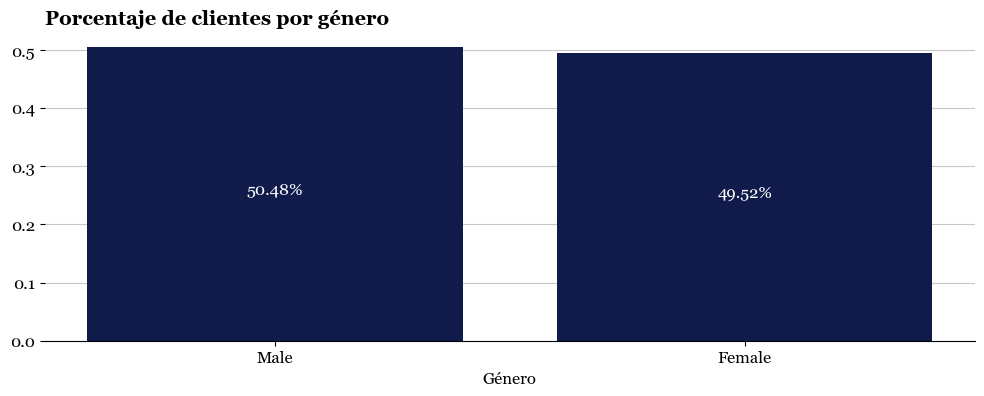

In [139]:
# Separar clientes por género
clients_gender = dfs['personal']['Gender'].value_counts(normalize=True)

# Graficar los géneros
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Porcentaje de clientes por género',
          weight='bold', loc='left')
bars = plt.bar(clients_gender.index,
               clients_gender,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height() * 100:1.2f}%',
             ha='center',
             color='white')
plt.xlabel('Género')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

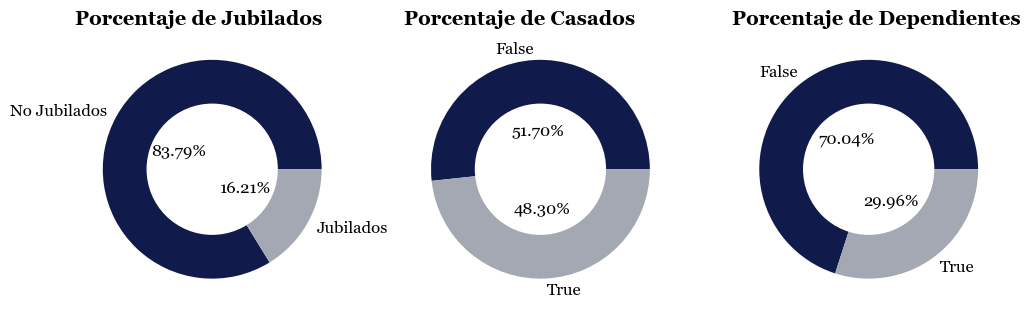

In [140]:
# Separar clientes por género
clients_senior = dfs['personal']['SeniorCitizen'].value_counts(normalize=True)
clients_senior.index = ['No Jubilados', 'Jubilados']
clients_partner = dfs['personal']['Partner'].value_counts(normalize=True)
clients_dependents = dfs['personal']['Dependents'].value_counts(normalize=True)

# Graficar los géneros
fig, ax = plt.subplots(1, 3, figsize=[12, 4])

ax[0].set_title('Porcentaje de Jubilados',
                loc='left', weight='bold')
clients_senior.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[0])
ax[0].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[0].transData)
ax[0].add_artist(hole1)

ax[1].set_title('Porcentaje de Casados',
                loc='left', weight='bold')
clients_partner.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[1])
ax[1].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[1].transData)
ax[1].add_artist(hole1)

ax[2].set_title('Porcentaje de Dependientes',
                loc='left', weight='bold')
clients_dependents.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[2])
ax[2].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[2].transData)
ax[2].add_artist(hole1)

plt.show()

En este dataframe también tenemos la misma cantidad de clientes del anterior y todos los registros son realmente únicos. Es decir, tenemos 7043 clientes. De estos, el 50.48% son clientes hombres y el 49.52% son mujeres. Además, sólo el 16.21% de ellos son jubilados, el 48.30% son casados y el 29.95% son dependientes.

## <span style="color:#0F19C9">Análisis Multivariable</span>

In [141]:
# Definir las columnas categóricas
cat_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Crear matrices vacías para almacenar los resultados
p_values_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                               index=cat_cols, columns=cat_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

# Llenar las matrices
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            # Crear la tabla de contingencia
            confusion_matrix = pd.crosstab(dfs['personal'][col1],
                                           dfs['personal'][col2])

            # Calcular p-value y Cramér's V
            p_value, cramers_v_value = cramers_v(confusion_matrix)
            p_values_matrix.loc[col1, col2] = p_value
            cramers_v_matrix.loc[col1, col2] = cramers_v_value
        else:
            # Si col1 == col2, entonces la relación es perfecta (Cramér's V = 1)
            cramers_v_matrix.loc[col1, col2] = 1
            p_values_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de valores p')
display(p_values_matrix)
print('Matriz de V de Cramér')
display(cramers_v_matrix)

Matriz de valores p


,Gender,SeniorCitizen,Partner,Dependents
Gender,NaN,9.005893e-01,0.898234,3.916839e-01
SeniorCitizen,0.900589,NaN,0.176829,5.196629e-70
Partner,0.898234,1.768285e-01,NaN,0.000000e+00
Dependents,0.391684,5.196629e-70,0.000000,NaN


Matriz de V de Cramér


,Gender,SeniorCitizen,Partner,Dependents
Gender,1.000000,0.001488,0.001524,0.010207
SeniorCitizen,0.001488,1.000000,0.016093,0.210765
Partner,0.001524,0.016093,1.000000,0.452366
Dependents,0.010207,0.210765,0.452366,1.000000


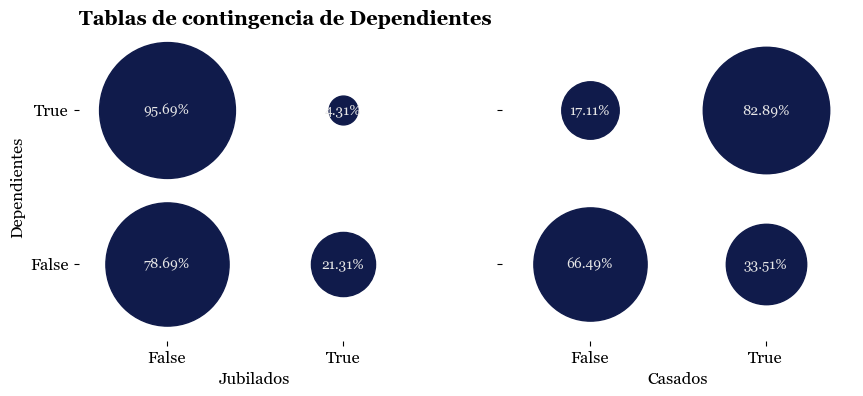

In [142]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(dfs['personal']['Dependents'],
                          dfs['personal']['SeniorCitizen'],
                          normalize='index') * 100
cont_table2 = pd.crosstab(dfs['personal']['Dependents'],
                          dfs['personal']['Partner'],
                          normalize='index') * 100

# Hacer gráfica de burbujas de tabla de contingencia
fig, ax = plt.subplots(1, 2, figsize=[10, 4], sharey=True)

# Ampliar los límites de los ejes
x_margin = 0.5
y_margin = 0.5

# Primera gráfica: Dependientes vs SeniorCitizen
ax[0].set_title('Tablas de contingencia de Dependientes',
                weight='bold', loc='left')
for (i, j), val in np.ndenumerate(cont_table1):
    ax[0].scatter(j, i, s=val * 100, color=juan_colors[0])
    ax[0].text(j, i, f'{val:.2f}%', ha='center',
               va='center', fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax[0].set_xlim(-x_margin, len(cont_table1.columns) - 1 + x_margin)
ax[0].set_ylim(-y_margin, len(cont_table1.index) - 1 + y_margin)
ax[0].set_xlabel('Jubilados')
ax[0].set_ylabel('Dependientes')
ax[0].set_xticks(range(len(cont_table1.columns)), cont_table1.columns)
ax[0].set_yticks(range(len(cont_table1.index)), cont_table1.index)
ax[0].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Segunda gráfica: Dependientes vs Partner
for (i, j), val in np.ndenumerate(cont_table2):
    ax[1].scatter(j, i, s=val * 100, color=juan_colors[0])
    ax[1].text(j, i, f'{val:.2f}%', ha='center',
               va='center', fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax[1].set_xlim(-x_margin, len(cont_table2.columns) - 1 + x_margin)
ax[1].set_ylim(-y_margin, len(cont_table2.index) - 1 + y_margin)
ax[1].set_xlabel('Casados')
ax[1].set_xticks(range(len(cont_table2.columns)), cont_table2.columns)
ax[1].set_yticks(range(len(cont_table2.index)), cont_table2.index)
ax[1].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.show()

Debido a que todas nuestras columnas son categóricas entonces decidimos realizar pruebas V de Cramér. Según los resultados, de acuerdo a los valores P, únicamente tendremos dos relaciones importantes a tener en cuenta, las relaciones de la columna `Dependents` con `SeniorCitizen` y `Partner`, teniendo en esta última una fuerte evidencia de una relación significativa, pues su valor es 0. Esto lo comprobamos con la prueba V de Cramér en la que tenemos la relación más fuerte con un valor de 0.45, mientras la relación con `Dependents` es moderada con un coeficiente de 0.21.

Cuando graficamos las burbujas correspondiente a estas dos características, nos damos cuenta que de las personas dependientes, el 95.69% de ellas no están jubiladas y que el 82.89% de ellas están casadas.

# <span style="color:#0F19C9">Dataframe internet</span>

Exploraremos el dataframe internet, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

In [143]:
# Encontrar el porcentaje de personas que han contratado internet
print('Los usuarios que han contratado internet han sido el',
      dfs['internet']['CustomerID'].nunique(
      ) / dfs['contract']['CustomerID'].nunique() * 100,
      '% de clientes')

Los usuarios que han contratado internet han sido el 78.33309669175067 % de clientes


In [144]:
# Verificar la unicidad de usuarios
dfs['internet']['CustomerID'].nunique() == dfs['internet'].shape[0]

True

In [145]:
# Corregir los tipos de columna
dfs['internet']['OnlineSecurity'] = dfs['internet']['OnlineSecurity'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['internet']['OnlineBackup'] = dfs['internet']['OnlineBackup'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['internet']['DeviceProtection'] = dfs['internet']['DeviceProtection'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['internet']['TechSupport'] = dfs['internet']['TechSupport'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['internet']['StreamingTV'] = dfs['internet']['StreamingTV'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')
dfs['internet']['StreamingMovies'] = dfs['internet']['StreamingMovies'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')

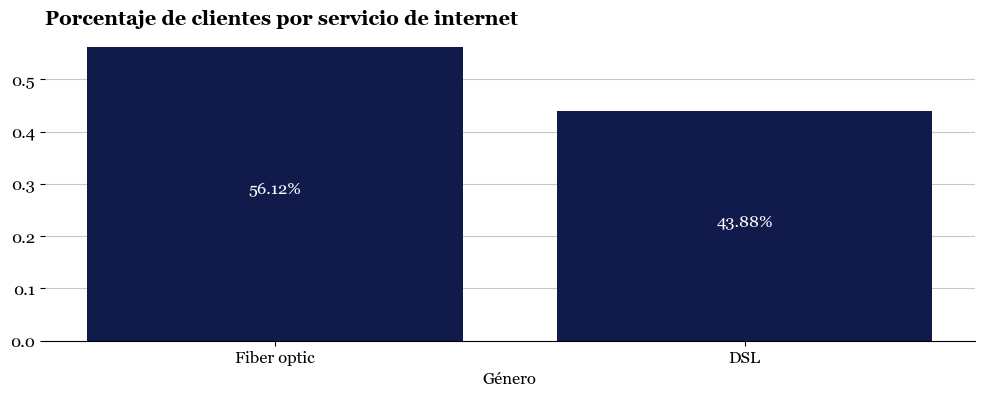

In [146]:
# Separar clientes por género
clients_service = dfs['internet']['InternetService'].value_counts(
    normalize=True)

# Graficar los géneros
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Porcentaje de clientes por servicio de internet',
          weight='bold', loc='left')
bars = plt.bar(clients_service.index,
               clients_service,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height() * 100:1.2f}%',
             ha='center',
             color='white')
plt.xlabel('Género')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

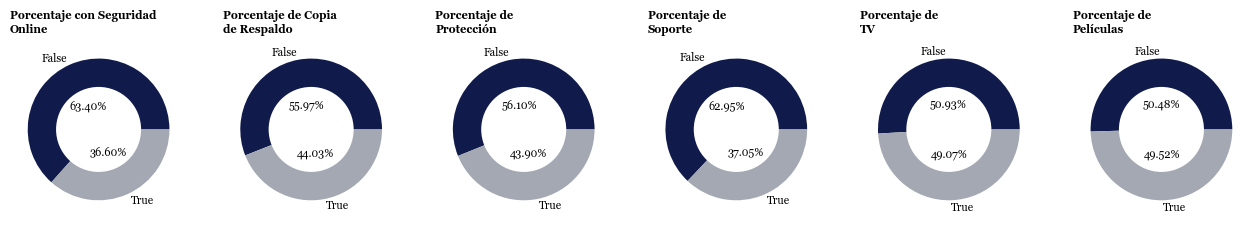

In [147]:
# Separar clientes por género
clients_sec = dfs['internet']['OnlineSecurity'].value_counts(normalize=True)
clients_back = dfs['internet']['OnlineBackup'].value_counts(normalize=True)
clients_prot = dfs['internet']['DeviceProtection'].value_counts(normalize=True)
clients_tech = dfs['internet']['TechSupport'].value_counts(normalize=True)
clients_tv = dfs['internet']['StreamingTV'].value_counts(normalize=True)
clients_mov = dfs['internet']['StreamingMovies'].value_counts(normalize=True)

# Graficar los géneros
fig, ax = plt.subplots(1, 6, figsize=[16, 4])

ax[0].set_title('Porcentaje con Seguridad \nOnline',
                loc='left', weight='bold',
                size=8)
clients_sec.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[0], fontsize=8)
ax[0].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[0].transData)
ax[0].add_artist(hole1)

ax[1].set_title('Porcentaje de Copia \nde Respaldo',
                loc='left', weight='bold',
                size=8)
clients_back.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[1], fontsize=8)
ax[1].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[1].transData)
ax[1].add_artist(hole1)

ax[2].set_title('Porcentaje de \nProtección',
                loc='left', weight='bold',
                size=8)
clients_prot.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[2], fontsize=8)
ax[2].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[2].transData)
ax[2].add_artist(hole1)

ax[3].set_title('Porcentaje de \nSoporte',
                loc='left', weight='bold',
                size=8)
clients_tech.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[3], fontsize=8)
ax[3].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[3].transData)
ax[3].add_artist(hole1)

ax[4].set_title('Porcentaje de \nTV',
                loc='left', weight='bold',
                size=8)
clients_tv.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[4], fontsize=8)
ax[4].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[4].transData)
ax[4].add_artist(hole1)

ax[5].set_title('Porcentaje de \nPelículas',
                loc='left', weight='bold',
                size=8)
clients_mov.plot. \
    pie(autopct='%1.2f%%', pctdistance=0.35,
        colors=[juan_colors[0], juan_colors[2]],
        ax=ax[5], fontsize=8)
ax[5].set_ylabel('')
hole1 = plt.Circle((0, 0), 0.6,
                   facecolor='white', transform=ax[5].transData)
ax[5].add_artist(hole1)

plt.show()

El 78.33% de los clientes han contratado el servicio de internet, luego de confirmar que todos los usuarios de nuestro dataframe sean únicos. De estos, el 56.12% han contratado fibra óptica y el 43.88% DSL.

En general, se ven contrataciones muy balanceadas. Únicamente en el caso de los que contratan la seguridad online y el soporte técnico tienen un porcentaje menor al 37% con 37.05% y 36.60% respectivamente. En las otras columnas, las personas que contratan el servicio de televisión y de películas y no los clientes que no lo hacen son muy parejos, con un 49.07% y 49.52% que si lo hacen, respectivamente.

## <span style="color:#0F19C9">Análisis Multivariable</span>

In [148]:
# Definir las columnas categóricas
cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies']

# Crear matrices vacías para almacenar los resultados
p_values_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                               index=cat_cols, columns=cat_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

# Llenar las matrices
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            # Crear la tabla de contingencia
            confusion_matrix = pd.crosstab(dfs['internet'][col1],
                                           dfs['internet'][col2])

            # Calcular p-value y Cramér's V
            p_value, cramers_v_value = cramers_v(confusion_matrix)
            p_values_matrix.loc[col1, col2] = p_value
            cramers_v_matrix.loc[col1, col2] = cramers_v_value
        else:
            # Si col1 == col2, entonces la relación es perfecta (Cramér's V = 1)
            cramers_v_matrix.loc[col1, col2] = 1
            p_values_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de valores p')
display(p_values_matrix)
print('Matriz de V de Cramér')
display(cramers_v_matrix)

Matriz de valores p


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
InternetService,NaN,2.188604e-61,2.842633e-01,9.274842e-01,5.851327e-56,7.114842e-36,4.131907e-32
OnlineSecurity,2.188604e-61,NaN,1.767673e-40,1.561687e-36,1.795673e-91,1.220077e-03,3.791601e-05
OnlineBackup,2.842633e-01,1.767673e-40,NaN,7.161019e-43,2.553830e-45,1.333847e-27,4.257060e-24
DeviceProtection,9.274842e-01,1.561687e-36,7.161019e-43,NaN,2.033639e-68,1.456162e-93,5.641000e-102
TechSupport,5.851327e-56,1.795673e-91,2.553830e-45,2.033639e-68,NaN,5.345627e-33,3.314712e-33
StreamingTV,7.114842e-36,1.220077e-03,1.333847e-27,1.456162e-93,5.345627e-33,NaN,2.160713e-228
StreamingMovies,4.131907e-32,3.791601e-05,4.257060e-24,5.641000e-102,3.314712e-33,2.160713e-228,NaN


Matriz de V de Cramér


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
InternetService,1.000000,0.222563,0.014416,0.001225,0.212182,0.168342,0.158801
OnlineSecurity,0.222563,1.000000,0.179332,0.169956,0.273082,0.043542,0.055466
OnlineBackup,0.014416,0.179332,1.000000,0.184787,0.190208,0.146570,0.136322
DeviceProtection,0.001225,0.169956,0.184787,1.000000,0.235337,0.276252,0.288653
TechSupport,0.212182,0.273082,0.190208,0.235337,1.000000,0.161103,0.161636
StreamingTV,0.168342,0.043542,0.146570,0.276252,0.161103,1.000000,0.434392
StreamingMovies,0.158801,0.055466,0.136322,0.288653,0.161636,0.434392,1.000000


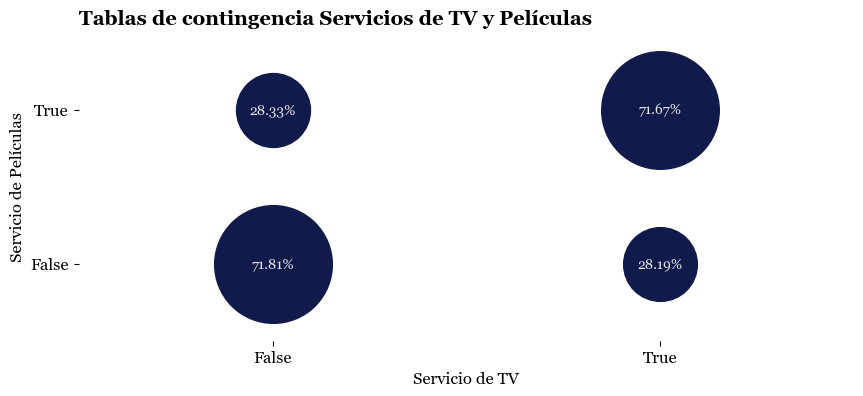

In [149]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(dfs['internet']['StreamingTV'],
                          dfs['internet']['StreamingMovies'],
                          normalize='index') * 100

# Hacer gráfica de burbujas de tabla de contingencia
fig, ax = plt.subplots(figsize=[10, 4])

# Ampliar los límites de los ejes
x_margin = 0.5
y_margin = 0.5

# Primera gráfica: Dependientes vs SeniorCitizen
ax.set_title('Tablas de contingencia Servicios de TV y Películas',
             weight='bold', loc='left')
for (i, j), val in np.ndenumerate(cont_table1):
    ax.scatter(j, i, s=val * 100, color=juan_colors[0])
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center',
            fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax.set_xlim(-x_margin, len(cont_table1.columns) - 1 + x_margin)
ax.set_ylim(-y_margin, len(cont_table1.index) - 1 + y_margin)
ax.set_xlabel('Servicio de TV')
ax.set_ylabel('Servicio de Películas')
ax.set_xticks(range(len(cont_table1.columns)), cont_table1.columns)
ax.set_yticks(range(len(cont_table1.index)), cont_table1.index)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.show()

En este dataframe también encontramos 6 columnas booleanas y una categórica en la que observamos el tipo de internet que se contrató, por lo que tiene todo el sentido que volvamos a aplicar tanto la prueba de Chi Cuadrado como la de V de Cramér. Aquí encontramos muchas relaciones muy interesantes:
- Respecto al tipo de servicio contratado, tenemos relaciones importantes pero todas con una fuerza media.
- Respecto a la seguridad, también con fuerza media y débil.
- Respecto a la administración de la nube, con fuerza media, de nuevo.
- Pero en la protección adicional, tenemos la segunda relación más fuerte con `StreamingTV` con un valor V de Cramér de 0.27, aunque sigue siendo media.
- La relación más fuerte de todo el dataframe, con un valor V de Cramér de 0.43 entre `StreamingTV` y `StreamingMovies`, la única relación realmente fuerte de nuestro dataframe. En donde podemos ver, a partir de nuestra gráfica de burbujas que la elección de contratar el servicio de Películas está influenciada por la decisión de contratar el servicio de TV.

# <span style="color:#0F19C9">Dataframe phone</span>

Exploraremos el dataframe phone, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

In [150]:
# Verificar la unicidad de usuarios
dfs['phone']['CustomerID'].nunique() == dfs['phone'].shape[0]

True

In [151]:
# Encontrar el porcentaje de personas que han contratado telefonía
print('Los usuarios que han contratado internet han sido el',
      dfs['phone']['CustomerID'].nunique(
      ) / dfs['contract']['CustomerID'].nunique() * 100,
      '% de clientes')

Los usuarios que han contratado internet han sido el 90.31662643759762 % de clientes


In [152]:
# Corregir los tipos de columna
dfs['phone']['MultipleLines'] = dfs['phone']['MultipleLines'] \
    .replace({'Yes': 1, 'No': 0}) \
    .astype('bool')

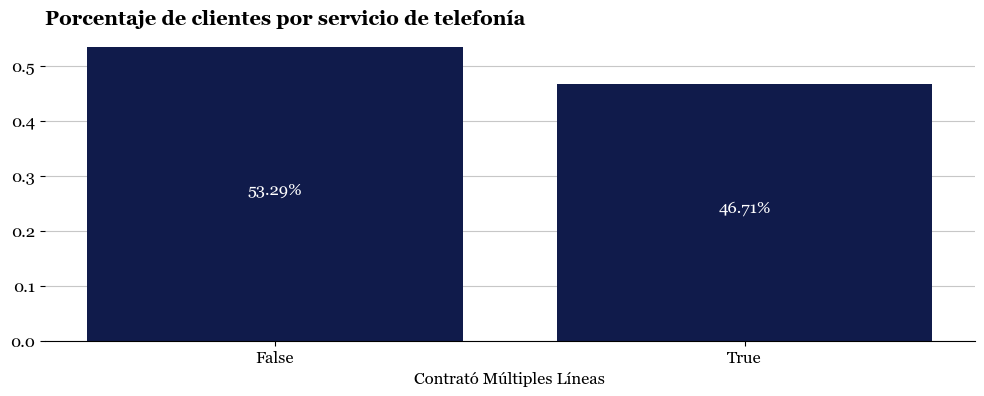

In [153]:
# Separar clientes por género
clients_multiple = dfs['phone']['MultipleLines'].value_counts(normalize=True)

# Graficar los géneros
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Porcentaje de clientes por servicio de telefonía',
          weight='bold', loc='left')
bars = plt.bar(['False', 'True'],
               clients_multiple,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height() * 100:1.2f}%',
             ha='center',
             color='white')
plt.xlabel('Contrató Múltiples Líneas')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

De nuevo, encontramos que cada usuario es único de nuestra lista es único y que en el total de consumidores, el 90.31% contrató nuestro servicio de telefonía. De ellos, el 46.71% contrató el servicio de múltiples líneas de telefonía.

# <span style="color:#0F19C9">Análisis Entre Dataframes</span>

Finalmente, vamos a generar un solo dataframe en el que combinemos la información de todos los dataframes y encontraremos relaciones importantes entre ellos.

In [154]:
# Juntar todos los dataframes en uno
df = pd.merge(dfs['contract'], dfs['personal'],
              on='CustomerID', how='outer') \
    .merge(dfs['internet'], on='CustomerID', how='outer') \
    .merge(dfs['phone'], on='CustomerID', how='outer')

In [155]:
# Extraemos las columnas categóricas
cat_cols = [col for col in df.columns if col not in ['BeginDate', 'EndDate',
                                                     'CustomerID', 'MonthlyCharges',
                                                     'TotalCharges']]

# Crear matrices vacías para almacenar los resultados
p_values_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                               index=cat_cols, columns=cat_cols)
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

# Llenar las matrices
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            # Crear la tabla de contingencia
            confusion_matrix = pd.crosstab(df[col1],
                                           df[col2])

            # Calcular p-value y Cramér's V
            p_value, cramers_v_value = cramers_v(confusion_matrix)
            p_values_matrix.loc[col1, col2] = p_value
            cramers_v_matrix.loc[col1, col2] = cramers_v_value
        else:
            # Si col1 == col2, entonces la relación es perfecta (Cramér's V = 1)
            cramers_v_matrix.loc[col1, col2] = 1
            p_values_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de valores p')
display(p_values_matrix)
print('Matriz de V de Cramér')
display(cramers_v_matrix)

Matriz de valores p


,Type,PaperlessBilling,PaymentMethod,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
Type,NaN,5.450960e-49,4.067638e-213,0.791319,2.212979e-32,9.271466e-135,6.152878e-92,7.509756e-45,3.289571e-205,2.273158e-124,1.629772e-195,2.737692e-270,1.254285e-87,8.435675e-92,1.885707e-20
PaperlessBilling,5.450960e-49,NaN,4.115239e-94,0.335973,3.145315e-39,2.208681e-01,1.156861e-20,1.767177e-69,6.544005e-25,7.077295e-01,8.429012e-02,6.882904e-11,2.591161e-18,8.090430e-14,8.425506e-44
PaymentMethod,4.067638e-213,4.115239e-94,NaN,0.484648,2.380773e-58,3.344553e-40,1.793556e-34,1.753749e-102,1.273910e-71,9.605814e-39,2.084632e-47,8.158882e-75,9.100165e-33,8.757659e-35,1.038504e-84
Gender,7.913194e-01,3.359735e-01,4.846479e-01,NaN,9.005893e-01,8.982341e-01,3.916839e-01,4.371259e-01,1.907712e-01,3.103004e-01,1.000000e+00,5.402668e-01,6.055973e-01,4.782809e-01,5.811578e-01
SeniorCitizen,2.212979e-32,3.145315e-39,2.380773e-58,0.900589,NaN,1.768285e-01,5.196629e-70,2.841252e-50,3.071932e-16,8.168430e-01,4.129021e-01,1.062165e-23,1.311582e-02,2.141420e-04,2.427057e-34
Partner,9.271466e-135,2.208681e-01,3.344553e-40,0.898234,1.768285e-01,NaN,0.000000e+00,9.770010e-01,4.073696e-37,9.621138e-38,3.069672e-44,1.208032e-26,1.331204e-30,2.055601e-27,5.953341e-33
Dependents,6.152878e-92,1.156861e-20,1.793556e-34,0.391684,5.196629e-70,0.000000e+00,NaN,5.579507e-23,7.624154e-32,5.206350e-13,3.124407e-10,3.046792e-24,8.030819e-05,7.667325e-02,3.809311e-02
InternetService,7.509756e-45,1.767177e-69,1.753749e-102,0.437126,2.841252e-50,9.770010e-01,5.579507e-23,NaN,2.188604e-61,2.842633e-01,9.274842e-01,5.851327e-56,7.114842e-36,4.131907e-32,9.449214e-53
OnlineSecurity,3.289571e-205,6.544005e-25,1.273910e-71,0.190771,3.071932e-16,4.073696e-37,7.624154e-32,2.188604e-61,NaN,1.767673e-40,1.561687e-36,1.795673e-91,1.220077e-03,3.791601e-05,2.111772e-04
OnlineBackup,2.273158e-124,7.077295e-01,9.605814e-39,0.310300,8.168430e-01,9.621138e-38,5.206350e-13,2.842633e-01,1.767673e-40,NaN,7.161019e-43,2.553830e-45,1.333847e-27,4.257060e-24,1.956772e-29


Matriz de V de Cramér


,Type,PaperlessBilling,PaymentMethod,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
Type,1.000000,0.177645,0.266655,0.008153,0.143868,0.296039,0.244212,0.191916,0.413142,0.321260,0.403230,0.474352,0.269330,0.275720,0.119499
PaperlessBilling,0.177645,1.000000,0.248719,0.011465,0.156138,0.014588,0.111062,0.237206,0.138767,0.005047,0.023242,0.087823,0.117507,0.100555,0.174026
PaymentMethod,0.266655,0.248719,1.000000,0.018646,0.195985,0.162762,0.150744,0.293213,0.245253,0.180542,0.199657,0.250644,0.166062,0.171087,0.248335
Gender,0.008153,0.011465,0.018646,1.000000,0.001488,0.001524,0.010207,0.010462,0.017614,0.013660,0.000000,0.008245,0.006952,0.009546,0.006917
SeniorCitizen,0.143868,0.156138,0.195985,0.001488,1.000000,0.016093,0.210765,0.200735,0.110001,0.003118,0.011024,0.135113,0.033397,0.049837,0.153219
Partner,0.296039,0.014588,0.162762,0.001524,0.016093,1.000000,0.452366,0.000388,0.171375,0.172885,0.187835,0.143842,0.154816,0.146039,0.149923
Dependents,0.244212,0.111062,0.150744,0.010207,0.210765,0.452366,1.000000,0.132891,0.158105,0.097202,0.084717,0.136762,0.053092,0.023834,0.026002
InternetService,0.191916,0.237206,0.293213,0.010462,0.200735,0.000388,0.132891,1.000000,0.222563,0.014416,0.001225,0.212182,0.168342,0.158801,0.219837
OnlineSecurity,0.413142,0.138767,0.245253,0.017614,0.110001,0.171375,0.158105,0.222563,1.000000,0.179332,0.169956,0.273082,0.043542,0.055466,0.053287
OnlineBackup,0.321260,0.005047,0.180542,0.013660,0.003118,0.172885,0.097202,0.014416,0.179332,1.000000,0.184787,0.190208,0.146570,0.136322,0.162005


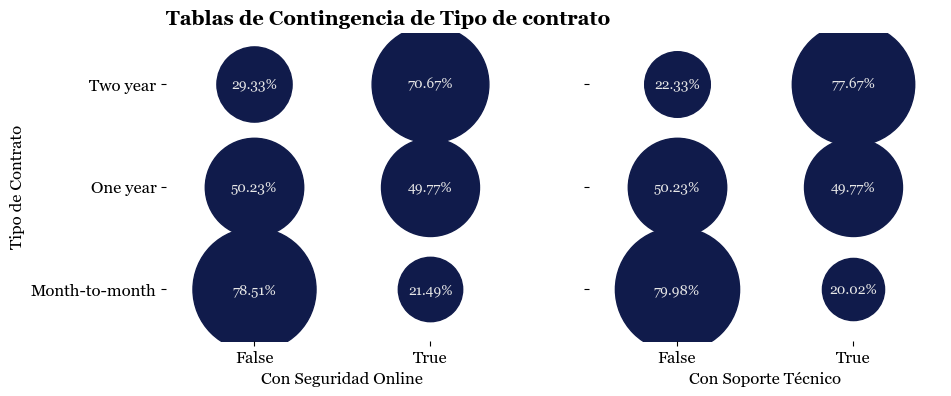

In [156]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(df['Type'],
                          df['OnlineSecurity'],
                          normalize='index') * 100
cont_table2 = pd.crosstab(df['Type'],
                          df['TechSupport'],
                          normalize='index') * 100

# Hacer gráfica de burbujas de tabla de contingencia
fig, ax = plt.subplots(1, 2, figsize=[10, 4], sharey=True)

# Ampliar los límites de los ejes
x_margin = 0.5
y_margin = 0.5

# Primera gráfica: Dependientes vs SeniorCitizen
ax[0].set_title('Tablas de Contingencia de Tipo de contrato',
                weight='bold', loc='left')
for (i, j), val in np.ndenumerate(cont_table1):
    ax[0].scatter(j, i, s=val * 100, color=juan_colors[0])
    ax[0].text(j, i, f'{val:.2f}%', ha='center',
               va='center', fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax[0].set_xlim(-x_margin, len(cont_table1.columns) - 1 + x_margin)
ax[0].set_ylim(-y_margin, len(cont_table1.index) - 1 + y_margin)
ax[0].set_xlabel('Con Seguridad Online')
ax[0].set_ylabel('Tipo de Contrato')
ax[0].set_xticks(range(len(cont_table1.columns)), cont_table1.columns)
ax[0].set_yticks(range(len(cont_table1.index)), cont_table1.index)
ax[0].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Segunda gráfica: Dependientes vs Partner
for (i, j), val in np.ndenumerate(cont_table2):
    ax[1].scatter(j, i, s=val * 100, color=juan_colors[0])
    ax[1].text(j, i, f'{val:.2f}%', ha='center',
               va='center', fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax[1].set_xlim(-x_margin, len(cont_table2.columns) - 1 + x_margin)
ax[1].set_ylim(-y_margin, len(cont_table2.index) - 1 + y_margin)
ax[1].set_xlabel('Con Soporte Técnico')
ax[1].set_xticks(range(len(cont_table2.columns)), cont_table2.columns)
ax[1].set_yticks(range(len(cont_table2.index)), cont_table2.index)
ax[1].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.show()

Vamos únicamente a tener en cuenta las relaciones con valores P menores a 0.05 que es nuestro valor de significancia estadística y con valor V de Cramér mayor a 0.4 serían:
- Type y OnlineSecurity: 0.41
- Type y TechSupport: 0.47
- Partner y Dependents (0.45) y StreamingTV y StreamingMovies (0.43), relaciones que ya se estudiaron individualmente.

Las relaciones de la columna `Type` nos dice que la elección de contratar seguridad online y de contratar soporte técnico está influenciada fuertemente por el tipo de contrato, es decir con cerca de un 78% de probabilidad, si el contrato es mensual, no se va a contratar ni la seguridad ni el soporte técnico. De la misma forma, los contratos que se adquieren a dos años tienden a contratar la seguridad online con un 70.67% de probabilidad y contratan soporte técnico con un 77.67% de probabilidad.

# <span style="color:#0F19C9">Crear Nuevas Características</span>

A partir de las columnas de fecha (`BeginDate` y `EndDate`) vamos a generar nuevas características que nos puedan proporcionar mayor información acerca de nuestros clientes.

In [157]:
# Crear nuevas características de BeginDate
df['StartYear'] = df['BeginDate'].dt.year
df['StartMonth'] = df['BeginDate'].dt.month

# Crear nuestra columna objetivo
df['Churn'] = np.where(df['EndDate'] == 'No', 0, 1)

In [158]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del dataframe para codificar las columnas categóricas
df_encoded = df.copy()

# Separar las columnas a estudiar
cat_cols = [col for col in df.columns if col not in ['CustomerID', 'BeginDate',
                                                     'EndDate', 'MonthlyCharges',
                                                     'TotalCharges', 'StartYear',
                                                     'StartMonth', 'Churn']]
num_cols = ['StartYear', 'StartMonth', 'Churn']

# Codificar las columnas categóricas y asegurar que son numéricas
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Crear la matriz vacía para almacenar los resultados
pointbiserial_matrix = pd.DataFrame(np.zeros((len(num_cols), len(cat_cols))),
                                    index=num_cols, columns=cat_cols)

# Llenar las matrices
for col1 in num_cols:
    for col2 in cat_cols:
        try:
            # Calcular coeficiente point-biserial
            pointbiserial = stats.pointbiserialr(
                df_encoded[col1], df_encoded[col2])[0]
            pointbiserial_matrix.loc[col1, col2] = pointbiserial
        except Exception as e:
            print(f"Error processing {col1} and {col2}: {e}")
            # Manejar cualquier error estableciendo NaN
            pointbiserial_matrix.loc[col1, col2] = np.nan

# Mostrar la matriz de valores p
print('Matriz de coeficientes point-biserial')
display(pointbiserial_matrix)

Matriz de coeficientes point-biserial


,Type,PaperlessBilling,PaymentMethod,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
StartYear,-0.648898,-0.019011,0.364938,-0.004386,-0.028418,-0.367419,-0.148000,0.034708,-0.120218,-0.158537,-0.157248,-0.120093,-0.119619,-0.123255,-0.243609
StartMonth,-0.200124,0.024053,0.100795,-0.003223,0.029381,-0.131669,-0.067989,-0.006452,-0.100007,-0.086964,-0.098442,-0.095621,-0.080753,-0.086878,-0.058505
Churn,-0.396713,0.191825,0.107062,-0.008612,0.150889,-0.150448,-0.164221,-0.047291,-0.332819,-0.291449,-0.281465,-0.329852,-0.205742,-0.207256,0.019423


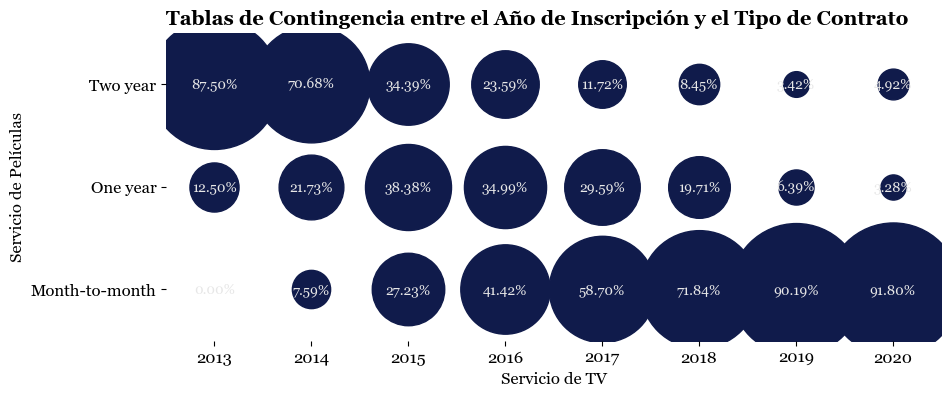

In [159]:
# Crear la tabla de contingencia
cont_table1 = pd.crosstab(df['Type'],
                          df['StartYear'],
                          normalize='columns') * 100

# Hacer gráfica de burbujas de tabla de contingencia
fig, ax = plt.subplots(figsize=[10, 4])

# Ampliar los límites de los ejes
x_margin = 0.5
y_margin = 0.5

# Primera gráfica: Dependientes vs SeniorCitizen
ax.set_title('Tablas de Contingencia entre el Año de Inscripción y el Tipo de Contrato',
             weight='bold', loc='left')
for (i, j), val in np.ndenumerate(cont_table1):
    ax.scatter(j, i, s=val * 100, color=juan_colors[0])
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center',
            fontsize=10, color=juan_colors[3])

# Ampliar los límites de los ejes x e y
ax.set_xlim(-x_margin, len(cont_table1.columns) - 1 + x_margin)
ax.set_ylim(-y_margin, len(cont_table1.index) - 1 + y_margin)
ax.set_xlabel('Servicio de TV')
ax.set_ylabel('Servicio de Películas')
ax.set_xticks(range(len(cont_table1.columns)), cont_table1.columns)
ax.set_yticks(range(len(cont_table1.index)), cont_table1.index)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.show()

In [160]:
# Eliminar las columnas innecesarias para el modelo
df_to_model = df.copy()
df_to_model = df_to_model[['Type', 'PaperlessBilling', 'PaymentMethod',
                           'MonthlyCharges', 'TotalCharges', 'Gender',
                           'SeniorCitizen', 'Partner', 'Dependents',
                           'InternetService', 'OnlineSecurity',
                           'OnlineBackup', 'DeviceProtection',
                           'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'MultipleLines', 'StartYear', 'StartMonth',
                           'Churn']]

# Exportar el dataframe final
df_to_model.to_csv('../Data/Processed.csv',
                   index=False)

# Convertimos las diferentes categorías a números
cat_cols = ['Type', 'PaperlessBilling', 'PaymentMethod', 'Gender',
            'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'MultipleLines']
for col in cat_cols:
    le = LabelEncoder()
    df_to_model[col] = le.fit_transform(df_to_model[col].astype(str))
df_to_model.sample(2)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,StartYear,StartMonth,Churn
761,0,0,2,89.25,1907.85,0,0,0,0,1,0,0,0,0,1,1,0,2017,12,1
5519,0,0,3,55.70,55.70,1,0,1,0,0,1,0,1,0,0,0,0,2020,1,0


No se creó la característica de Día de Comienzo ya que no sería relevante para nuestro conjunto de datos, pues todos los contratos comenzaron el día 1 del mes, lo mismo ocurre en el caso, que ya mencionamos, de `EndDate`. El único coeficiente de la Correlación Biserial Puntual que muestra una relación fuerte está entre `Type` y `StartYear` con un valor de -0.64 que como se ve en la gráfica de burbujas se debe a que en el transcurso de los años se ha visto una transición en el que la mayoría de los contratos correspondían a contratos a dos años (el 87.50% de las ventas del año 2013) al último año, el 2020, en el que la mayoría de contratos iniciados son mensuales, el 91.80%.

Finalmente, eliminamos las columnas innecesarias para el modelo que construiremos.

# <span style="color:#0F19C9">Conclusiones</span>

- Recibimos 4 archivos csv con datos limpios, pues no tienen datos nulos ni registros duplicados. Sólo debimos corregir ligeramente el nombre de las columnas para conservar un formato único en ellas. Los archivos contract y personal tienen 7043 registros correspondientes a 7043 usuarios de la compañía. De esos, 5517 contrataron el servicio de internet y 6361 el servicio de telefonía.
- Adicional al servicio de internet, se ofrecen otros servicios adicionales como antivirus, soporte técnico, streaming de tv, streaming de películas, entre otros.
- Los usuarios contrataron nuestros servicios a partir del 1 de octubre de 2013 y tenemos registros hasta el 1 de febrero de 2020, teniendo dos picos grandes de registros en 2014 y en 2019. También es importante mencionar la tendencia al alza en altas a partir del año 2017.
- El 73.46% de los usuarios aún están activos, mientras cada mes a partir de septiembre de 2019 hasta enero de 2020 abandonaron un 6% de clientes.
- Más de la mitad de servicios contratados han sido con pagos mensuales, un 55.02%, mientras el 24.07% fueron contratos con pago a dos años y el 20.91% con pago a un año. El 59.22% de contratos aceptaron las facturas digitales. El 33.58% de usuarios han pagado mediante cheques electrónicos.
- La mayor cantidad de pagos mensuales han sido de menos de USD $30, aunque hay otro pico importante entre USD $70 y USD $110. Mientras en los pagos totales tenemos una distribución normal sesgada hacia la derecha. Tampoco se encontraron valores atípicos en ninguna de estas dos columnas numéricas. Sin embargo, si hay una relación de fuerza media, confirmada con el coeficiente de Pearson de 0.65. Ahora, por su gráfica de residuo y el Test de Breusch-Pagan con un valor P de 0.0, comprobamos con significancia estadística y demostramos una heterocedastidad entre ellas.
- Encontramos una relación media entre el tipo de contrato contra la forma de pago y la factura impresa. Es decir, los pagos mensuales tienen una probabilidad del 47.74% de ser pagados electrónicamente y un 66.74% de recibir la factura impresa.
- También se demostró que el promedio de pagos mensuales de los contratos terminados es mayor que el promedio de estos pagos que aún continuan activos. Y esta relación es inversa con los pagos totales, es decir, el promedio de pagos totales en los que ya se terminó el contrato es menor que el promedio de los contratos activos.
- El 50.48% de nuestros clientes son hombres. El 16.21% son jubilados, el 48.30% son casados y el 29.95% son dependientes. Además, se comprobó que ser un cliente dependiente influye en que no sea jubilado con una probabilidad del 95.69%. Así mismo, la influencia entre ser dependiente y ser casado tiene una probabilidad del 82.89% y de no ser dependiente y tampoco ser casado es del 66.49%.
- Los usuarios que han contratado internet han sido el 78.33% de clientes que han contratado. De estos, el 56.12% contrataron Fibra Óptica. Únicamente en el caso de los usuarios que contrataron internet y además seguridad online y soporte técnico son las clases más desbalanceadas con un 37.05% y 36.60% respectivamente. Además, respecto a estos dos servicios, cuando el tipo de contrato es mensual, el 78.51% y el 79.98% no los van a contratar, mientras por el contrario, cuando el tipo de contrato es a dos años, los valores son de  70.67% y 77.67% respectivamente que si contratarán estos servicios. También encontramos que la contratación del servicio de TV influye en la contratación del servicio de Películas.
- Por otra parte, del total de usuarios, el 90.31% han contratado el servicio de telefonía, y de ellos, el 46.71% contrataron múltiples líneas.

# <span style="color:#0F19C9">Preguntas Aclaratorias</span>

- La principal duda que tengo es respecto al número de altas, tenemos dos picos importantes, uno en 2014 y otro en 2019, me gustaría entender un poco más a qué se deben estos picos.
- Debido a que nuestro análisis puede ser más preciso, me gustaría contar con información adicional de nuestros clientes, por ejemplo su edad o ciudad de residencia. Esto sería muy útil para poder encontrar patrones adicionales a partir de estas nuevas características. Sin embargo, también entiendo que estas características no sean importantes en este momento, debido a que estamos tratando de encontrar la solución únicamente en los servicios de la empresa y hacia el interior, sin contar en gran medida a los clientes.
- ¿Consideras que la mejor vía para continuar es a partir de un sólo dataframe con toda la información de la compañía como lo construí?¿O mejor deberíamos separar la base de datos y construir un modelo de cancelación sólo para los planes de internet y luego otro modelo completamente diferente para las cancelaciones en los planes de telefonía?

# <span style="color:#0F19C9">Plan</span>

Para el desarrollo de nuestro modelo, seguiremos los siguientes pasos:
- Una vez realizado el Análisis Exploratorio, continuaremos con el desarrollo de un análisis de componente principales (PCA por sus siglas en inglés). Aquí entrenaremos nuestro primer modelo de Machine Learning de Aprendizaje no Supervisado para esta tarea.
- Una vez encontramos los componentes principales de nuestro modelo, será importante confrontarlos con las relaciones que encontramos en nuestro Análisis Exploratorio para encontrar relaciones que nos ayuden a mejorar las métricas del modelo.
- Luego, entrenamos diferentes modelos de Aprendizaje Supervisado de Clasificación, ya que nuestra tarea principal será clasificar cada cliente con un 0 si nuestra predicción indica que no abandonará la compañía y 1 si es lo opuesto. Para este entrenamiento será importante dividir nuestro conjunto de datos en tres partes: un 60% que usaremos para entrenar el modelo, un 20% que usaremos para validarlo y un 20% que lo usaremos de prueba. Siguiendo los pasos del marco de administración CRISP-DM.
- Escojeremos el modelo con la mejor métrica AUC-ROC para pasarlo a un siguiente momento de afinación de hiperparámetros. Allí, de acuerdo al modelo en específico, afinaremos sus hiperparámetros buscando mejorar la métrica objetivo.
- Finalmente, aplicaremos nuestro modelo sobre los datos de prueba, el 20% de los datos totales divididos en el paso 3, para asegurarnos que el modelo se despliegue de forma correcta sobre unos datos que nunca antes había visto.
- Redactaremos el informe en el que le explicamos a la compañía el funcionamiento del modelo, así como las características más relevantes que se detallaron en la sección de Conclusiones del presente cuaderno.